In [1]:
#importing various packages
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#reading the dataset
df=pd.read_csv('/content/Heart Disease data.csv')

In [3]:
#checking the data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


There are thirteen features in Dataset
age: The person's age in years

sex: The person's sex (1 = male, 0 = female)

cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

chol: The person's cholesterol measurement in mg/dl

fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

thalach: The person's maximum heart rate achieved

exang: Exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

ca: The number of major vessels (0-3)

thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

target: Heart disease (0 = no, 1 = yes)

In [6]:
#change column name to Age, Gender, CP, RBP(Diastolic), SC, FBS, RER, MHRA, EIA, Oldpeak, Slope, Flourosopy, Thallium, Test, HD

df.columns = ['Age', 'Gender', 'CP', 'RBP(Diastolic)', 'SC', 'FBS', 'RER', 'MHRA', 'EIA', 'Oldpeak', 'Slope', 'Flourosopy', 'Thallium Test', 'HD']
df.head()


,Age,Gender,CP,RBP(Diastolic),SC,FBS,RER,MHRA,EIA,Oldpeak,Slope,Flourosopy,Thallium Test,HD
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [10]:
#change value of 0 as Female and 1 as Male in Gender column with

df['Gender'] = df['Gender'].replace({0: 'Female', 1: 'Male'})
df.head()


,Age,Gender,CP,RBP(Diastolic),SC,FBS,RER,MHRA,EIA,Oldpeak,Slope,Flourosopy,Thallium Test,HD
0,52,Female,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,Female,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,Female,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,Female,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,Male,0,138,294,1,1,106,0,1.9,1,3,2,0


In [11]:
# prompt: change value of Male as Female and Female as Male in Gender column

df['Gender'] = df['Gender'].replace({'Male': 'Female', 'Female': 'Male'})
df.head()


,Age,Gender,CP,RBP(Diastolic),SC,FBS,RER,MHRA,EIA,Oldpeak,Slope,Flourosopy,Thallium Test,HD
0,52,Male,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,Male,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,Male,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,Male,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,Female,0,138,294,1,1,106,0,1.9,1,3,2,0


In [12]:
#checking null values
df.isna().sum()

Age               0
Gender            0
CP                0
RBP(Diastolic)    0
SC                0
FBS               0
RER               0
MHRA              0
EIA               0
Oldpeak           0
Slope             0
Flourosopy        0
Thallium Test     0
HD                0
dtype: int64

In [13]:
#There are no null values in any of the columns

In [14]:
#now we will check for outliers

<Axes: xlabel='Age'>

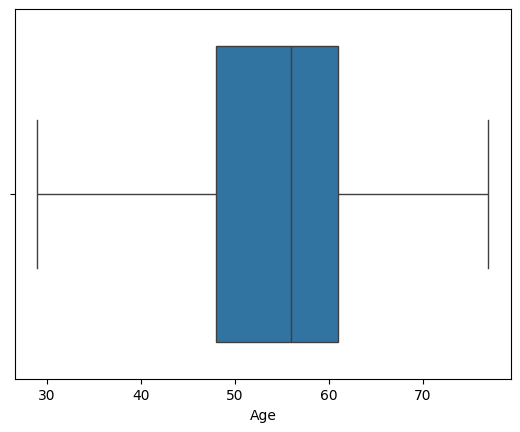

In [15]:
#checking outliers in Age Column
sns.boxplot(data=df,x='Age')

In [16]:
#there are no outliers in Age column

<Axes: xlabel='RBP(Diastolic)'>

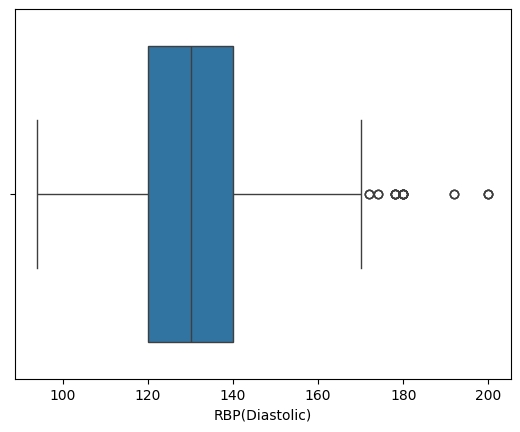

In [17]:
#checking outliers in RBP(Diastolic) Column
sns.boxplot(data=df,x='RBP(Diastolic)')

In [18]:
#we can see there are some outliers in RBP(Diastolic) column. But we will not remove them.
#We will replace those outliers with median value

In [19]:
# Calculating the Interquartile Range (IQR)
q1 = df["RBP(Diastolic)"].quantile(0.25)
q3 = df["RBP(Diastolic)"].quantile(0.75)
iqr = q3 - q1

# Defining the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identifying outliers
outliers = (df["RBP(Diastolic)"] < lower_bound) | (df["RBP(Diastolic)"] > upper_bound)

# Replace outliers with the median value
df.loc[outliers, "RBP(Diastolic)"] = df["RBP(Diastolic)"].median()

<Axes: xlabel='RBP(Diastolic)'>

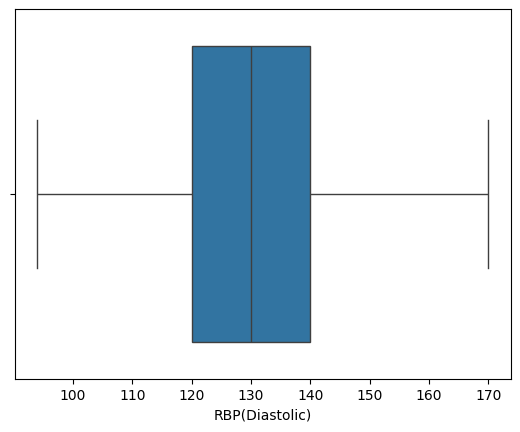

In [20]:
#checking outliers in RBP(Diastolic) Column
sns.boxplot(data=df,x='RBP(Diastolic)')

In [21]:
#there are no outliers left in the RBP(Diastolic) column

<Axes: xlabel='SC'>

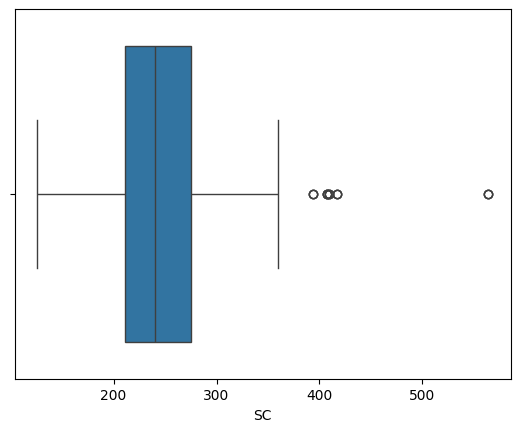

In [22]:
#checking outliers in SC Column
sns.boxplot(data=df,x='SC')

In [23]:
#there are some outliers.We will replace them with median value

In [24]:
# Calculating the Interquartile Range (IQR)
q1 = df["SC"].quantile(0.25)
q3 = df["SC"].quantile(0.75)
iqr = q3 - q1

# Defining the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identifying outliers
outliers = (df["SC"] < lower_bound) | (df["SC"] > upper_bound)

# Replace outliers with the median value
df.loc[outliers, "SC"] = df["SC"].median()

<Axes: xlabel='SC'>

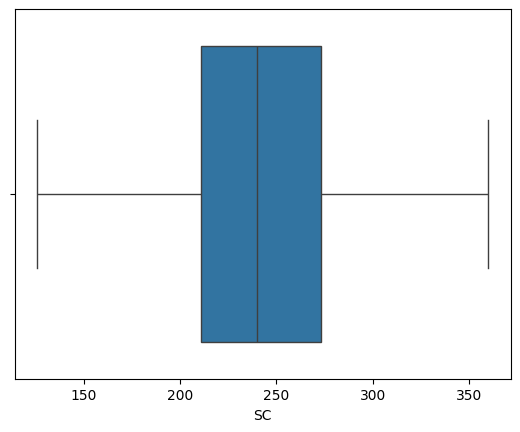

In [25]:
#checking outliers in SC Column
sns.boxplot(data=df,x='SC')

In [26]:
#there are no outliers left in the SC column

<Axes: xlabel='MHRA'>

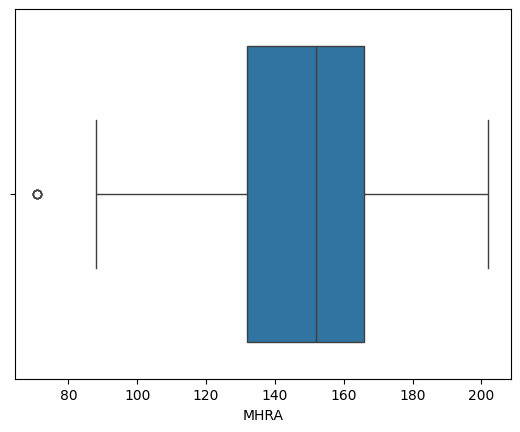

In [27]:
#checking outliers in MHRA Column
sns.boxplot(data=df,x='MHRA')

In [28]:
#there are some outliers.We will replace them with median value

In [29]:
# Calculating the Interquartile Range (IQR)
q1 = df["MHRA"].quantile(0.25)
q3 = df["MHRA"].quantile(0.75)
iqr = q3 - q1

# Defining the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identifying outliers
outliers = (df["MHRA"] < lower_bound) | (df["MHRA"] > upper_bound)

# Replace outliers with the median value
df.loc[outliers, "MHRA"] = df["MHRA"].median()

<Axes: xlabel='MHRA'>

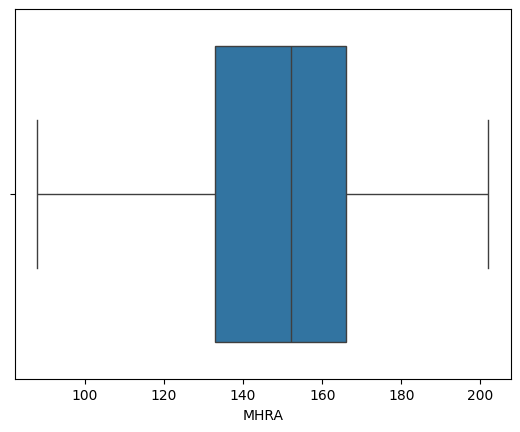

In [30]:
#checking outliers in MHRA Column
sns.boxplot(data=df,x='MHRA')

In [31]:
#there are no outliers left in the MHRA column

<Axes: xlabel='Oldpeak'>

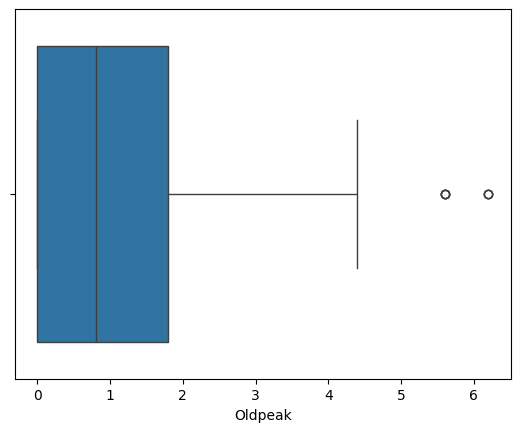

In [32]:
#checking outliers in Oldpeak Column
sns.boxplot(data=df,x='Oldpeak')

In [33]:
#there are some outliers.We will replace them with median value

In [34]:
# Calculating the Interquartile Range (IQR)
q1 = df["Oldpeak"].quantile(0.25)
q3 = df["Oldpeak"].quantile(0.75)
iqr = q3 - q1

# Defining the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identifying outliers
outliers = (df["Oldpeak"] < lower_bound) | (df["Oldpeak"] > upper_bound)

# Replace outliers with the median value
df.loc[outliers, "Oldpeak"] = df["Oldpeak"].median()

<Axes: xlabel='Oldpeak'>

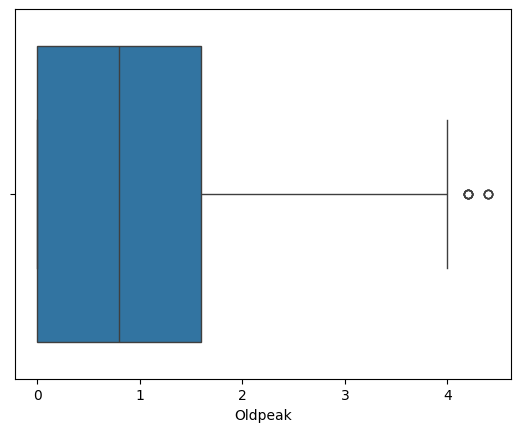

In [35]:
#checking outliers in Oldpeak Column
sns.boxplot(data=df,x='Oldpeak')

In [36]:
#as the outliers are still there, we will repeat the same process one more time

In [37]:
# Calculating the Interquartile Range (IQR)
q1 = df["Oldpeak"].quantile(0.25)
q3 = df["Oldpeak"].quantile(0.75)
iqr = q3 - q1

# Defining the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identifying outliers
outliers = (df["Oldpeak"] < lower_bound) | (df["Oldpeak"] > upper_bound)

# Replace outliers with the median value
df.loc[outliers, "Oldpeak"] = df["Oldpeak"].median()

<Axes: xlabel='Oldpeak'>

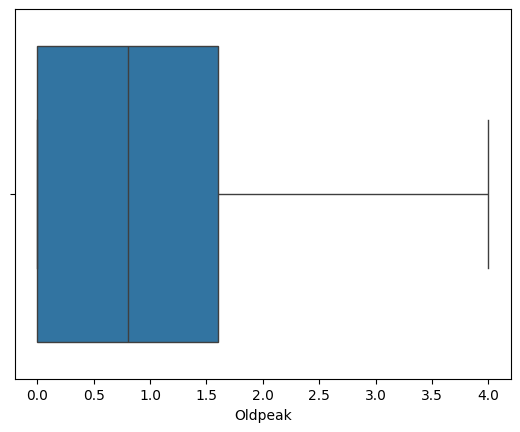

In [38]:
#checking outliers in Oldpeak Column
sns.boxplot(data=df,x='Oldpeak')

In [39]:
#there are no outliers left in the Oldpeak column

In [40]:
#But some values of Oldpeak column has value 0, which is practically not correct.
#So, we replace those values with the median of Oldpeak
# Replace 0 values in "Oldpeak" with the median
df.loc[df["Oldpeak"] == 0, "Oldpeak"] = df["Oldpeak"].median()

In [47]:
df.sample(15)

,Age,Gender,CP,RBP(Diastolic),SC,FBS,RER,MHRA,EIA,Oldpeak,Slope,Flourosopy,Thallium Test,HD
142,61,Male,3,134,234,0,1,145,0,2.6,1,2,2,0
605,71,Female,2,110,265,1,0,130,0,0.8,2,1,2,1
513,54,Male,0,110,206,0,0,108,1,0.8,1,1,2,0
327,57,Male,0,150,276,0,0,112,1,0.6,1,1,1,0
437,67,Male,0,120,229,0,0,129,1,2.6,1,2,3,0
158,67,Female,2,115,240,0,0,160,0,1.6,1,0,3,1
19,58,Male,2,140,211,1,0,165,0,0.8,2,0,2,1
848,58,Female,3,150,283,1,0,162,0,1.0,2,0,2,1
796,41,Male,1,135,203,0,1,132,0,0.8,1,0,1,1
566,50,Female,0,110,254,0,0,159,0,0.8,2,0,2,1


In [52]:
# prompt: chaange values of HD as yes and no

df['HD'] = df['HD'].replace({0: 'No', 1: 'Yes'})
df.head()


,Age,Gender,CP,RBP(Diastolic),SC,FBS,RER,MHRA,EIA,Oldpeak,Slope,Flourosopy,Thallium Test,HD
0,52,Male,0,125,212,0,1,168,0,1.0,2,2,3,No
1,53,Male,0,140,203,1,0,155,1,3.1,0,0,3,No
2,70,Male,0,145,174,0,1,125,1,2.6,0,0,3,No
3,61,Male,0,148,203,0,1,161,0,0.8,2,1,3,No
4,62,Female,0,138,294,1,1,106,0,1.9,1,3,2,No


In [53]:
df.sample(10)

,Age,Gender,CP,RBP(Diastolic),SC,FBS,RER,MHRA,EIA,Oldpeak,Slope,Flourosopy,Thallium Test,HD
633,61,Male,0,138,166,0,0,125,1,3.6,1,1,2,No
755,48,Male,2,124,255,1,1,175,0,0.8,2,2,2,Yes
676,60,Male,0,130,253,0,1,144,1,1.4,2,1,3,No
870,48,Female,2,130,275,0,1,139,0,0.2,2,0,2,Yes
631,49,Male,1,130,266,0,1,171,0,0.6,2,0,2,Yes
538,46,Male,0,120,249,0,0,144,0,0.8,2,0,3,No
918,59,Male,3,134,204,0,1,162,0,0.8,2,2,2,No
824,61,Male,0,138,166,0,0,125,1,3.6,1,1,2,No
13,51,Male,0,140,298,0,1,122,1,0.8,1,3,3,No
865,60,Female,3,150,240,0,1,171,0,0.9,2,0,2,Yes


In [55]:
#now our dataset is clean and without any outliers. We can do the analysis now
#lets export the dataframe as csv file

In [57]:
df.to_csv('Heart_Disease_Diagnostic_cleaned_data.csv', index=False)